# Machine Learning Regressions

### Price Prediction Case Study 
#### Boston Housing Prices

Base Packages

In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Import Data

In [30]:
boston = pd.read_csv('boston.csv')

In [32]:
boston.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


Variables/Columns: 

- CRIM: per capita crime rate by town (numeric)
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft. (numeric)
- INDUS: proportion of non-retail business acres per town (numeric)
- CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise) (categorical)
- NOX: nitric oxides concentration (parts per 10 million) (numeric)
- RM: average number of rooms per dwelling (numeric)
- AGE: proportion of owner-occupied units built prior to 1940 (numeric)
- DIS: weighted distances to five Boston employment centres (numeric)
- RAD: index of accessibility to radial highways (numeric)
- TAX: full-value property-tax rate per $10,000 (numeric)
- PTRATIO: pupil-teacher ratio by town (numeric)
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of [people of African American -descent] by town (numeric)
- LSTAT: % lower status of the population (numeric)
- MEDV: Median value of owner-occupied homes in $1000s (target variable) (numeric)

In [36]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [38]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


# 2. Data Exploration & Cleaning

In [41]:
boston.shape

(506, 14)

Correlation to get Similarities

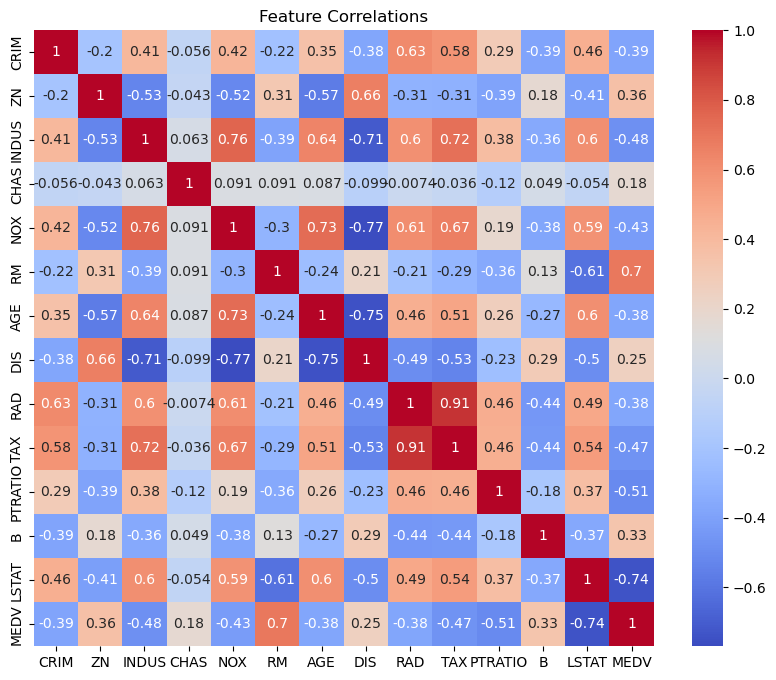

In [14]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(boston.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlations")
plt.show()



Pair Plot example:

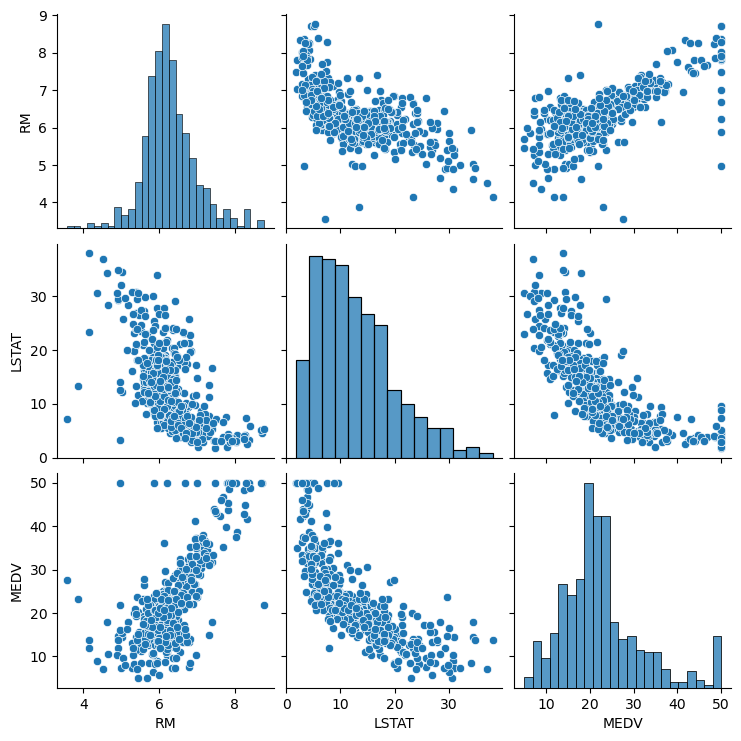

In [16]:
# pair plot code: 
sns.pairplot(boston, vars=["RM", "LSTAT", "MEDV"])
plt.show()

Histogram to view distributions:

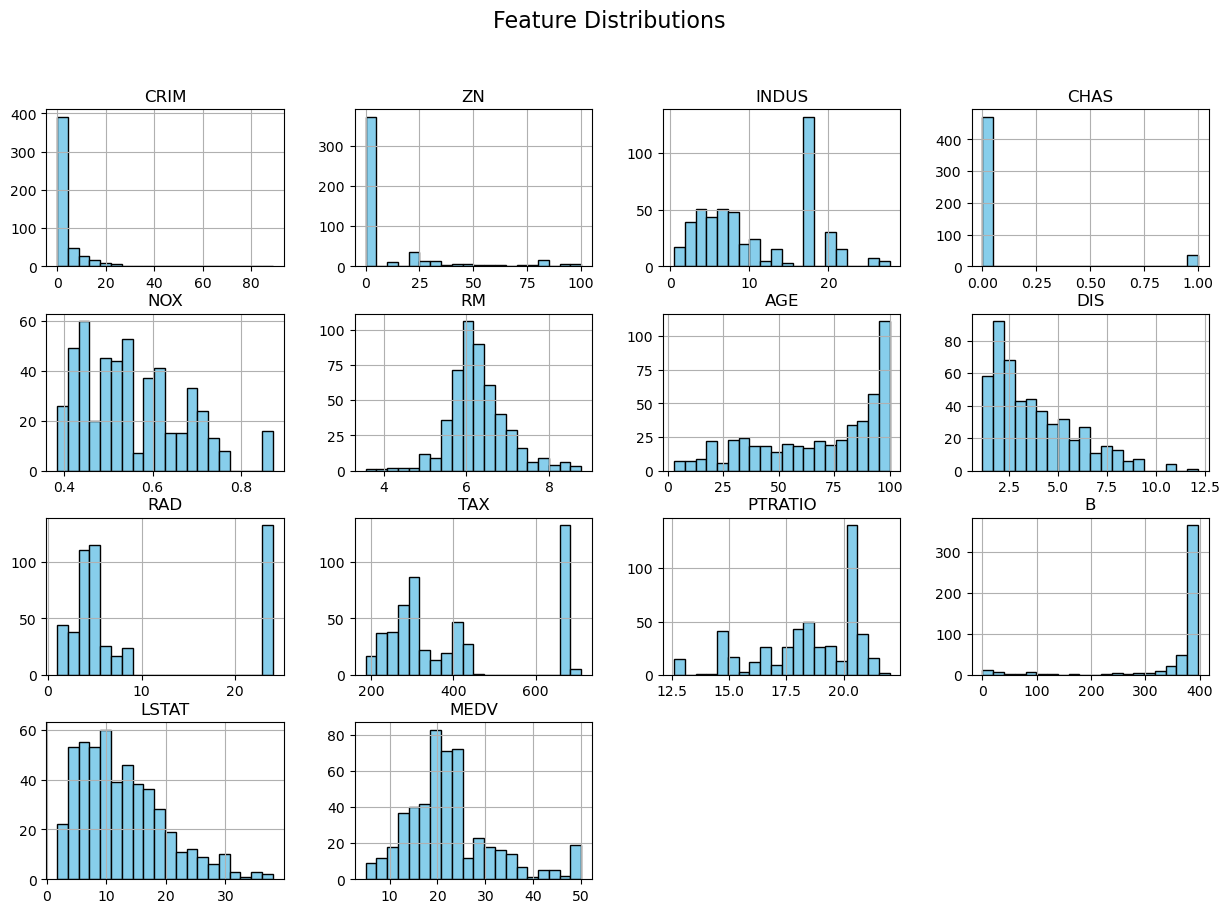

In [18]:
#Histogram Code:
boston.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

Box plots for outlier detection: 

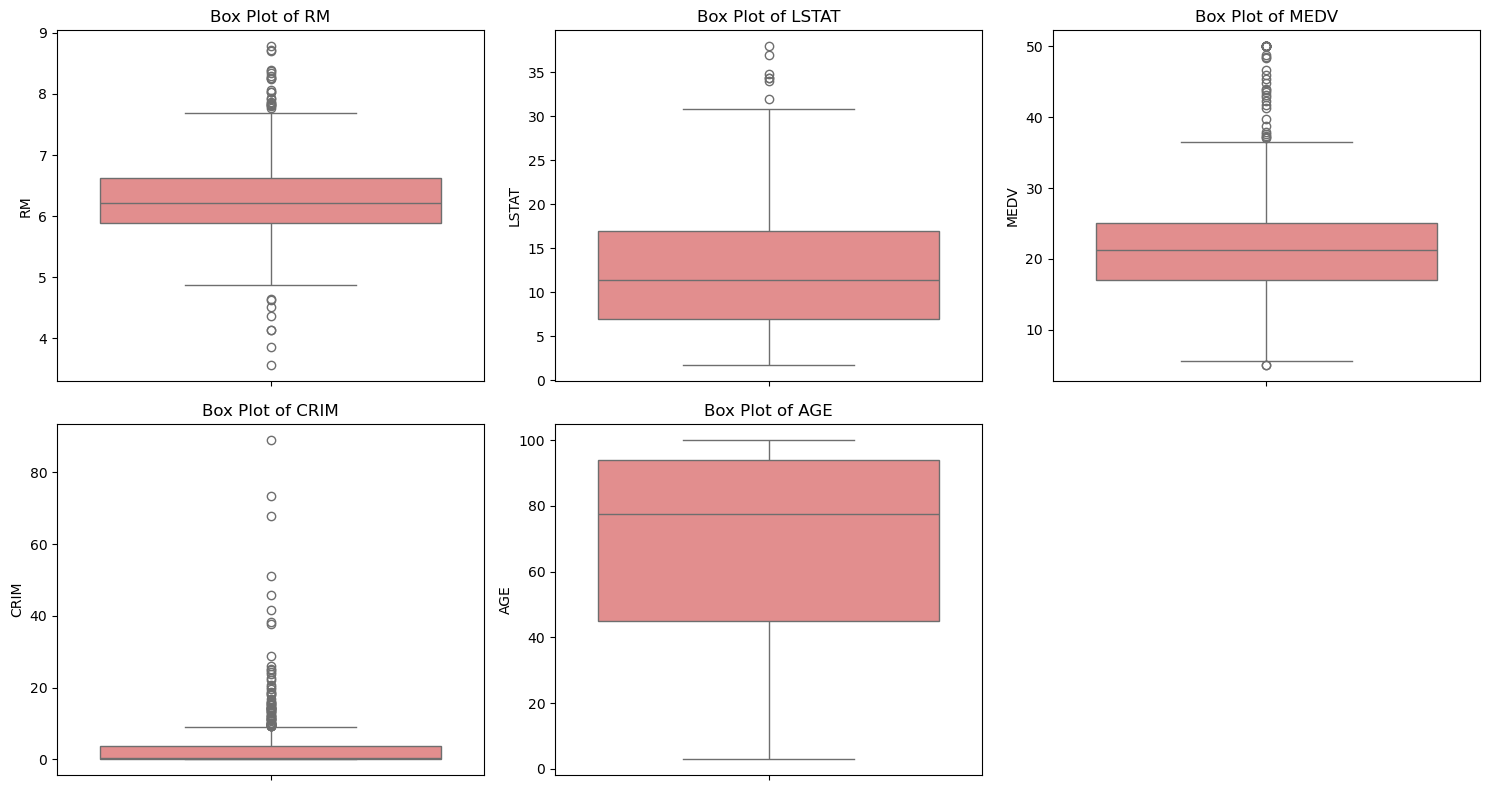

In [20]:
# Box plots for selected features
features_to_plot = ["RM", "LSTAT", "MEDV", "CRIM", "AGE"]

plt.figure(figsize=(15, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=boston[feature], color='lightcoral')
    plt.title(f"Box Plot of {feature}", fontsize=12)
    plt.tight_layout()
plt.show()

Check Missing: 

In [13]:

# Ccheck missing values
missing_values = boston.isnull().sum()

# print missing values
print(missing_values)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


Check for duplicates

In [35]:
# Check duplicates
duplicates = boston.duplicated().sum()

# print
print("Number of Duplicates: ", duplicates)



Number of Duplicates:  0


Standardize feature values to ensure they are on similar scales for optimal regression performance:

In [29]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaled_features = scaler.fit_transform(boston.drop(columns=["MEDV"]))
boston_scaled = pd.DataFrame(scaled_features, columns=boston.columns[:-1])
boston_scaled["MEDV"] = boston["MEDV"]

In [31]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


SPlit Testing and Training: 

In [42]:
from sklearn.model_selection import train_test_split

# features: all other columns except the target (MEDV)
X = boston.drop(columns=["MEDV"])

# Target: MEDV
y = boston["MEDV"]

In [48]:
#Split between training test, Typically done at around 80%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#validate:
print("Training Data Shape:")
print('X_train shape: , ', X_train.shape)
print('y_train shape: , ', y_train.shape)
print()
print("Testing Data Shape:")
print('X_test shape: , ', X_test.shape)
print('y_test shape: , ', y_test.shape)


Training Data Shape:
X_train shape: ,  (404, 13)
y_train shape: ,  (404,)

Testing Data Shape:
X_test shape: ,  (102, 13)
y_test shape: ,  (102,)


# Models

# Linear

- Statistical method to model relationship between a dependent variable (y) and more dependent variables x
- used for predicting continuous values (prices, etc.)
  

Packages:

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Model Construction:

In [54]:
# Initialize the model
linear_regressor = LinearRegression()

# fit the model
linear_regressor.fit(X_train, y_train)

# Predictions
y_pred = linear_regressor.predict(X_test)

Evaluation:

In [59]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # or (mse ** 0.5 #or np.
r2 = r2_score(y_test, y_pred)

#metrics:
print("Metrics:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R^2: ", r2)

Metrics:
MAE:  3.1890919658879158
MSE:  24.291119474974067
RMSE:  4.928602182665392
R^2:  0.6687594935356245


# Evaluation:
- MAE: The average absolute difference between predicted and actual values.
- MSE/RMSE: Penalizes larger errors more heavily than MAE.
- R² Score: Indicates the proportion of variance in the target variable that the - model explains (ranges from 0 to 1, where 1 is perfect).

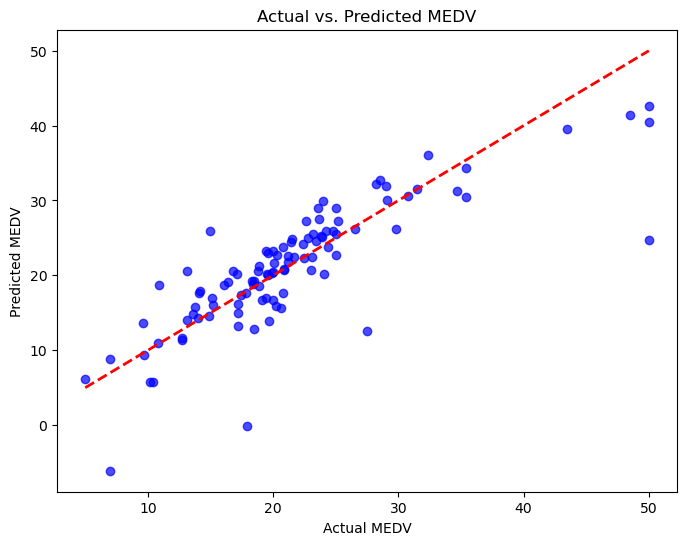

In [62]:
#prediction plot:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs. Predicted MEDV")
plt.show()

# Regularized Models

# Ridge Regression:

- Ridge regression is a regularized linear regression technique used to prevent overfitting by adding a penalty to the magnitude of the coefficients.
- Penalty term is controlled by the alpha parameter. Higher alpha increases the regularization, shrinking the coefficients more.
- Ridge helps when multicollinearity or when the number of features is high compared to the number of data points. 

In [65]:
from sklearn.linear_model import Ridge


In [67]:
#Initialize Regression with parameter alpha:
ridge_regressor = Ridge(alpha=1.0)

# Fit the model
ridge_regressor.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_regressor.predict(X_test)


In [71]:
# evaluate:
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mse_ridge ** 0.5
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Metrics")
print('MAE Ridge: ', mae_ridge)
print('MSE Ridge: ', mse_ridge)
print('RMSE Ridge: ', rmse_ridge)
print('R2 Ridge: ', r2_ridge)




Metrics
MAE Ridge:  3.1329474278055347
MSE Ridge:  24.477191227708662
RMSE Ridge:  4.947442897872461
R2 Ridge:  0.6662221670168521


In [73]:

# Create a DataFrame for coefficients
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Linear Coefficients": linear_regressor.coef_,
    "Ridge Coefficients": ridge_regressor.coef_
})

print(coeff_df)


    Feature  Linear Coefficients  Ridge Coefficients
0      CRIM            -0.113056           -0.109234
1        ZN             0.030110            0.032271
2     INDUS             0.040381            0.007498
3      CHAS             2.784438            2.545470
4       NOX           -17.202633           -9.537952
5        RM             4.438835            4.464505
6       AGE            -0.006296           -0.012191
7       DIS            -1.447865           -1.338700
8       RAD             0.262430            0.248882
9       TAX            -0.010647           -0.011475
10  PTRATIO            -0.915456           -0.828604
11        B             0.012351            0.012642
12    LSTAT            -0.508571           -0.523833


NOT MUCH CHANGE

# Hyperparameter Tuning:
- Grid Search
- Fit models and find best alpha in the case of ridge regression

In [76]:
#Tune Alpha with GridSearch:
from sklearn.model_selection import GridSearchCV

#Set Grid:
param_grid = {"alpha": [0.1, 1.0, 10, 100]}

#initialize
ridge_cv = GridSearchCV(Ridge(), param_grid, scoring="neg_mean_squared_error", cv=5)

#Fit Data
ridge_cv.fit(X_train, y_train)

#Get best parameter:
ridge_best = ridge_cv.best_estimator_
print("Ridge Best Estimator: ", ridge_best)

y_pred_ridge_best = ridge_best.predict(X_test)


Ridge Best Estimator:  Ridge(alpha=0.1)


In [78]:
# evaluate:
mae_best_ridge = mean_absolute_error(y_test, y_pred_ridge_best)
mse_best_ridge = mean_squared_error(y_test, y_pred_ridge_best)
rmse_best_ridge = mse_best_ridge ** 0.5
r2_best_ridge = r2_score(y_test, y_pred_ridge_best)

print("Metrics")
print('MAE Ridge: ', mae_best_ridge)
print('MSE Ridge: ', mse_best_ridge)
print('RMSE Ridge: ', rmse_best_ridge)
print('R2 Ridge: ', r2_best_ridge)

Metrics
MAE Ridge:  3.1788559832344787
MSE Ridge:  24.301025500192754
RMSE Ridge:  4.929607033039526
R2 Ridge:  0.668624412202141


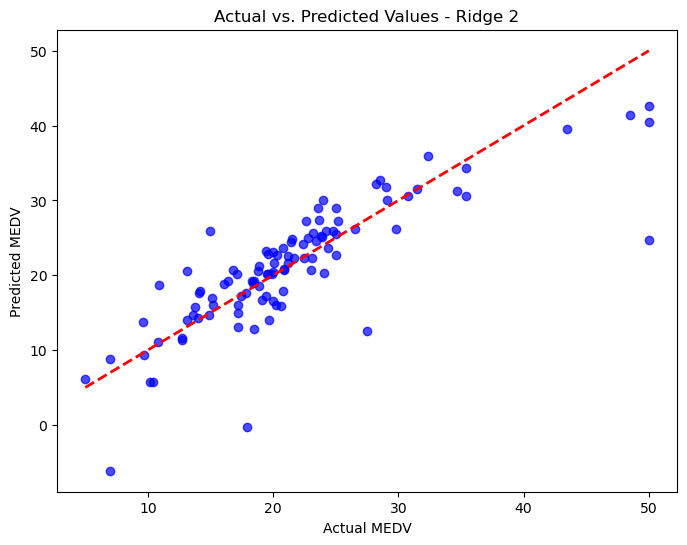

In [82]:
#Visual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge_best, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs. Predicted Values - Ridge 2")
plt.show()

# Lasso:

LASSO REgression:
- Another technique similar to Ridge, but applies L1 instead of L2 penalty
- L1 penalty encourages sparsity in the model by forcing some coefficients to be exactly zero
- can be useful for feature selection Lasso can perform well when you believe that only a small number of features are important

In [85]:
from sklearn.linear_model import Lasso


In [87]:
# initialize with alpha 
lasso_regressor = Lasso(alpha=1.0)

# Fit the model w/ training
lasso_regressor.fit(X_train, y_train)

# Make predictions on test
y_pred_lasso = lasso_regressor.predict(X_test)

In [95]:
# Calculate Metrics
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = mse_lasso ** 0.5
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print metrics
print("Lasso MAE: ", mae_lasso)
print("Lasso MSE: ", mse_lasso)
print("Lasso Regression RMSE: ", rmse_lasso)
print("Lasso R2 Score: ",r2_lasso)


Lasso MAE:  3.2535397673681636
Lasso MSE:  24.409489761299707
Lasso Regression RMSE:  4.940596093721861
Lasso R2 Score:  0.6671453631686304


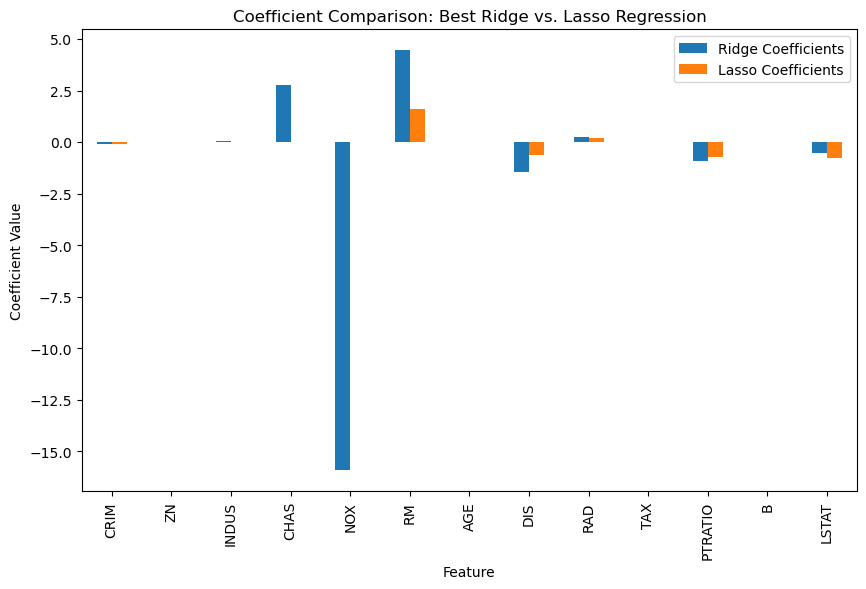

In [97]:
# Create a DataFrame for coefficients
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Ridge Coefficients": ridge_best.coef_,
    "Lasso Coefficients": lasso_regressor.coef_
})

# Plot coefficients
coeff_df.set_index("Feature").plot(kind="bar", figsize=(10, 6))
plt.title("Coefficient Comparison: Best Ridge vs. Lasso Regression")
plt.ylabel("Coefficient Value")
plt.show()


# Decision Tree Regression

DT:
- non- linear model that splits the data into regions based on feature values and makes predictions based on average of the target value in each region
- HIghly interpretable and can capture complex relationships between the features and target variables
- Model builds tree structure of decisions and their possible consequence (branches)

In [99]:
from sklearn.tree import DecisionTreeRegressor

# Initialize 
tree_regressor = DecisionTreeRegressor(random_state=42)

#Fit the model w/ training data
tree_regressor.fit(X_train, y_train)

# Make predictions w/ test
y_pred_tree = tree_regressor.predict(X_test)

In [101]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = mse_tree ** 0.5
r2_tree = r2_score(y_test, y_pred_tree)

# Print metrics
print("Decision Tree MAE: ", mae_lasso)
print("Decisiot Tree MSE: ", mse_lasso)
print("Decision Tree RMSE: ", rmse_lasso)
print("Decision R2 Score: ",r2_lasso)



Decision Tree MAE:  3.2535397673681636
Decisiot Tree MSE:  24.409489761299707
Decision Tree RMSE:  4.940596093721861
Decision R2 Score:  0.6671453631686304


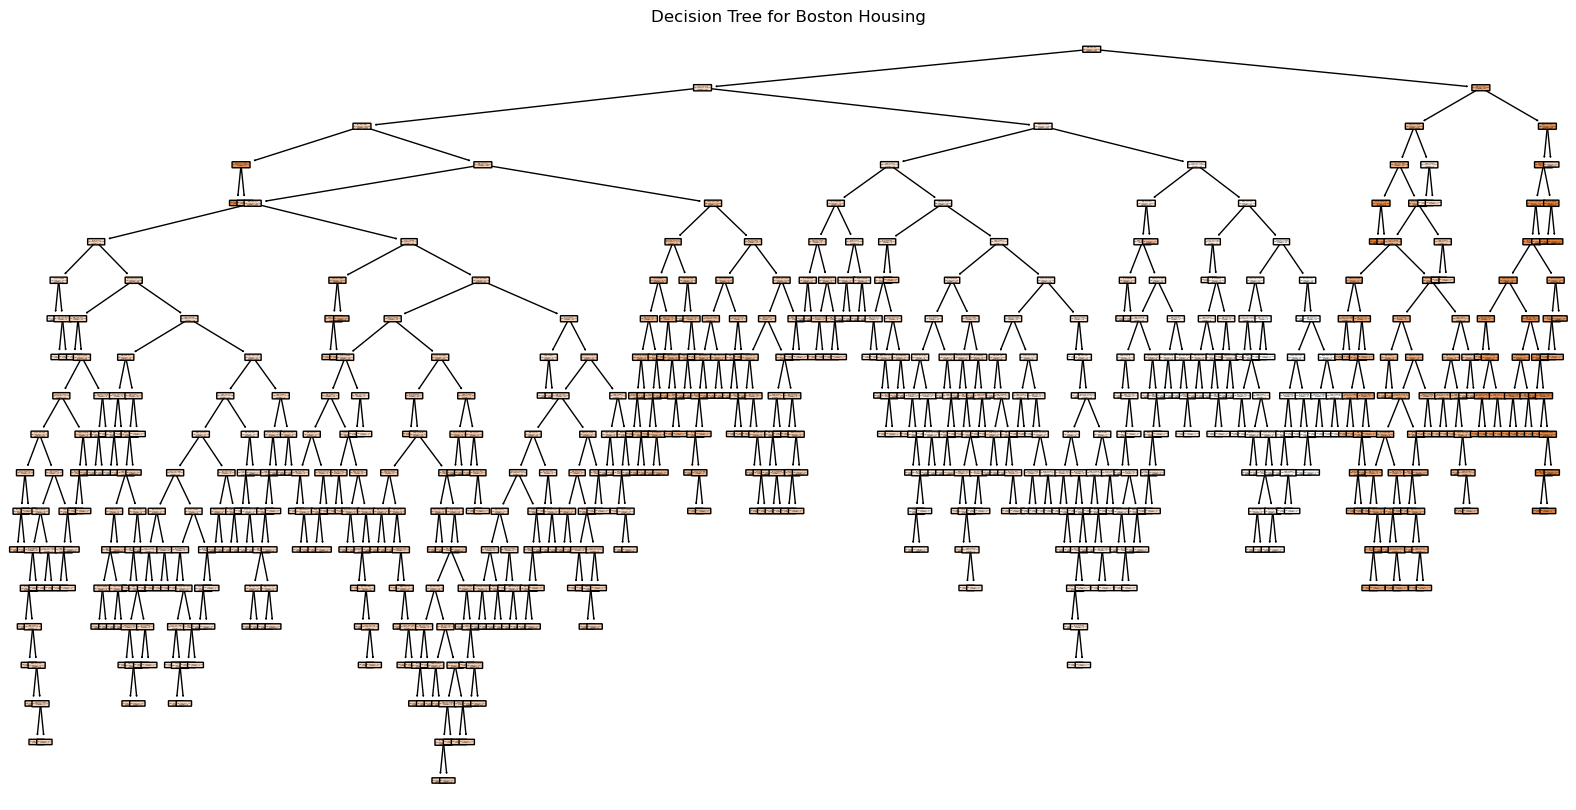

In [103]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_regressor, filled=True, feature_names=X.columns, rounded=True)
plt.title("Decision Tree for Boston Housing")
plt.show()


# Pruning:
-  Can also prevent overfitting we can prune the tree by limiting the depth or number of leaf nodes. This improves interpretability and accuracy on unseen data.
-  setting max depth to 5 in this test case

In [105]:
# Pruned Treee max_depth = 5
tree_regressor_pruned = DecisionTreeRegressor(random_state=42, max_depth=5)

# Fit the pruned model
tree_regressor_pruned.fit(X_train, y_train)

# Predictions with the pruned model
y_pred_tree_pruned = tree_regressor_pruned.predict(X_test)

# Calculate evaluation metrics for the pruned model
mae_tree_pruned = mean_absolute_error(y_test, y_pred_tree_pruned)
mse_tree_pruned = mean_squared_error(y_test, y_pred_tree_pruned)
rmse_tree_pruned = mse_tree_pruned ** 0.5
r2_tree_pruned = r2_score(y_test, y_pred_tree_pruned)

# Print metrics for pruned model
print("Pruned Tree MAE: ", mae_tree_pruned)
print("Pruned Tree MSE): ", mse_tree_pruned)
print("Pruned Tree RMSE): ", rmse_tree_pruned)
print("Pruned Tree R2 Score: ", r2_tree_pruned)


Pruned Tree MAE:  2.308156816332771
Pruned Tree Regression MSE):  8.553906584646844
Pruned Tree Regression RMSE):  2.924706239034417
Pruned Tree Regression R2 Score:  0.8833565347917995


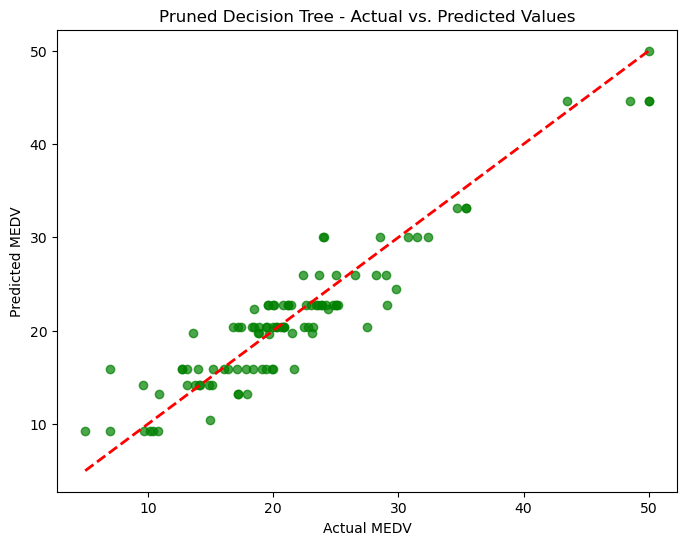

In [108]:
# Plot: Actual vs. Predicted for the pruned Decision Tree model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_tree_pruned, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Pruned Decision Tree - Actual vs. Predicted Values")
plt.show()


# Random Forest Regression

- An ensemble learning method that uses multiple decision trees to make predictions, combining predictions of individual trees to improve accuracy and reduce overfitting
- creates multiple trees during training and outputs the mean prediction of the individual trees

Benefits:
- Robustness: less prone to overfitting compared to single tree
- Handling non-linearity (complex relationship between features and target variable)
- Feature importance: provides insight into feature importance and help feature selection

In [110]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_regressor.predict(X_test)

In [114]:
# Calculate evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

print("RF MAE: ", mae_rf)
print("RF MSE: ", mse_rf)
print("RF RMSE: ", rmse_rf)
print("RF R2 Score: ", r2_rf)


RF MAE:  2.0441176470588234
RF MSE:  8.074299960784312
RF RMSE:  2.8415312704216915
RF R2 Score:  0.889896585000501


### Feature importance

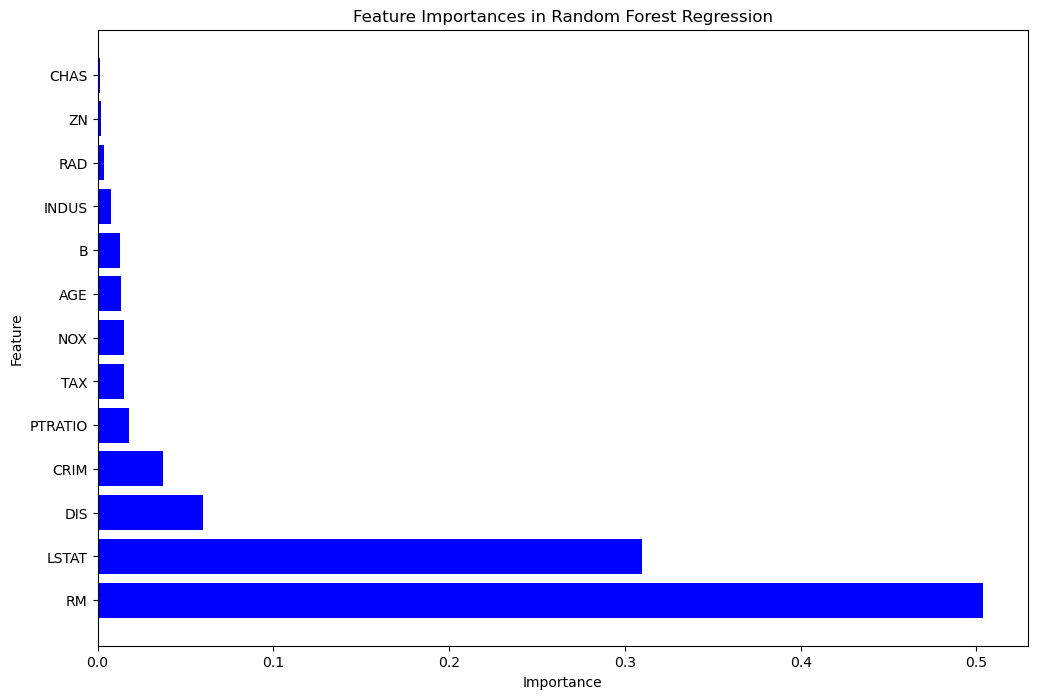

In [116]:
# Get feature importances
importances = rf_regressor.feature_importances_

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(X.columns[indices], importances[indices], color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances in Random Forest Regression")
plt.show()


### MOST INFLUENTIAL FEATURES:
- RM: (Rooms in the dwelling)
- LSTAT (lower socioeconomic status)
- DIS (weighted distance from 5 boston employment centers)
- CRIM (Crime)

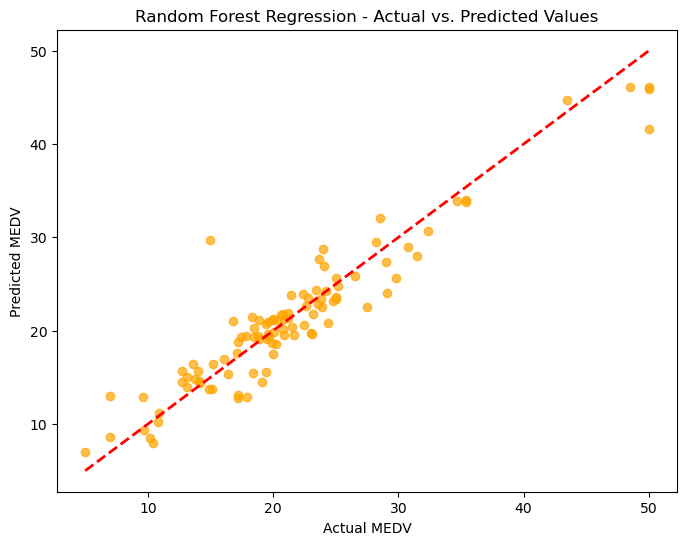

In [118]:
# Plot: Actual vs. Predicted for Random Forest Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Random Forest Regression - Actual vs. Predicted Values")
plt.show()
